# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [299]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [300]:
# %pip install --upgrade plotly

### Import Statements

In [301]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import iso3166 as iso
from datetime import datetime, timedelta
plt.style.use("fivethirtyeight")

### Notebook Presentation

In [302]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [303]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [304]:
print(f"Data frame's shape : {df_data.shape}")
print(f"Data frame's columns :\n {df_data.columns}")
print(f"\nColumn is NaN :\n {df_data.isna().any()}")
print(f"\nNaN values count in Price column :\n { df_data.Price.isna().value_counts()}")

Data frame's shape : (4324, 9)
Data frame's columns :
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

Column is NaN :
 Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

NaN values count in Price column :
 Price
True     3360
False     964
Name: count, dtype: int64


In [305]:
df_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [306]:
df_data.drop(columns=["Unnamed: 0.1","Unnamed: 0"], inplace=True)

In [307]:
df_data.Mission_Status.value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [308]:
# df_data.dropna(inplace=True)

In [309]:
print(f"The new shape of our Dataframe after cleaning : {df_data.shape}")

The new shape of our Dataframe after cleaning : (4324, 7)


In [310]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [311]:
# df_data['Price'].fillna(value="0", inplace=True)

In [312]:
df_data['Price'].sort_values()

3683    1,160.0
3149    1,160.0
3180    1,160.0
3243    1,160.0
3384    1,160.0
         ...   
4319        NaN
4320        NaN
4321        NaN
4322        NaN
4323        NaN
Name: Price, Length: 4324, dtype: object

**Converting to float type**

In [313]:
df_data['Price'] = df_data['Price'].apply(lambda s : str(s).replace(",",""))
df_data.Price = df_data.Price.astype("float")

In [314]:
df_data.shape

(4324, 7)

**Defining a function that Adds some missing values to make all records in the correct format to later cast it into a Datetime type**

In [315]:
def add_time(x):
    if "UTC" in x:
        return x
    else:
        x = x +' 12:00 UTC' 
        return x

In [316]:
df_data['Date'] = df_data['Date'].apply(lambda s : add_time(s))
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y %H:%M %Z')

In [317]:
# df_data['Mission_Status'] = df_data['Mission_Status'].astype('category')

In [318]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


## Descriptive Statistics

In [319]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [320]:
df_data[(df_data['Organisation'] == "NASA") & (df_data['Price'] > 0) ]['Price'].mean()
# df_data['Price'].sort_values().tail(20)

511.9463087248322

In [321]:
# df_data[(df_data['Organisation'] == "NASA") ]['Price'].sort_values()

In [322]:
mean_price_launch_per_org = df_data[(df_data['Price'] > 0) ].groupby("Organisation").mean(numeric_only=True).sort_values(by='Price')
mean_price_launch_per_org.head()

,Price
Organisation,
Rocket Lab,7.50
Virgin Orbit,12.00
Sandia,15.00
EER,20.00
ExPace,28.30


In [323]:
ussr_mask = df_data['Organisation'] == "RVSN USSR"
price_null = df_data['Price'] == 0

In [324]:
# filling the missing price values of each Org with itsown price mean
for org in mean_price_launch_per_org.index:
    mean_price = mean_price_launch_per_org.loc[org,'Price']
    df_data.loc[((df_data['Organisation'] == org) & price_null), "Price"] = mean_price
    # print(f"the mean price launch for {org} is {mean_price}")
        

In [325]:
df_data.groupby("Organisation").mean(numeric_only=True).sort_values(by='Price', ascending=False).head(10)

,Price
Organisation,
RVSN USSR,"5,000.00"
NASA,511.95
Boeing,177.29
Arianespace,170.26
ULA,151.00
ILS,101.54
MHI,95.47
Martin Marietta,80.16
US Air Force,59.65


**The mean after ignoring the ouliers and null values**

In [326]:
# the mean after ignoring the ouliers and null values 
mean_no_outliers = df_data[(df_data['Price'] > 2) & (df_data['Price'] < 30)]['Price'].mean()
mean_no_outliers

23.174751773049646

**Now we fill the missing price values of the rest companies that have no record with this mean**

In [327]:
df_data.fillna({"Price":mean_no_outliers},inplace=True)

In [328]:
df_data.groupby("Organisation").mean(numeric_only=True).sort_values(by='Price', ascending = False ).head(10)

,Price
Organisation,
NASA,381.93
ULA,112.65
Arianespace,73.78
MHI,55.02
SpaceX,54.67
Northrop,47.35
ILS,45.32
Eurockot,41.80
JAXA,37.24


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organization.

In [329]:
# df_data['Organisation'].value_counts().rename_axis("Country").reset_index(name='counts')

In [330]:
# launches_per_Company = df_data['Organisation'].value_counts().rename_axis("Organisation").reset_index(name='counts')

Text(0.5, 1.0, 'Number of Launches per Company')

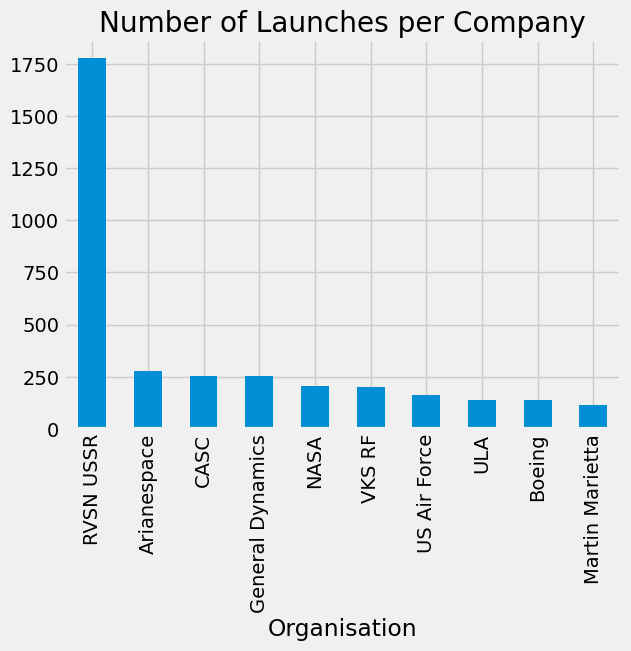

In [331]:
df_data['Organisation'].value_counts().head(10).plot(kind='bar')
plt.title("Number of Launches per Company")

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

<Axes: ylabel='Rocket_Status'>

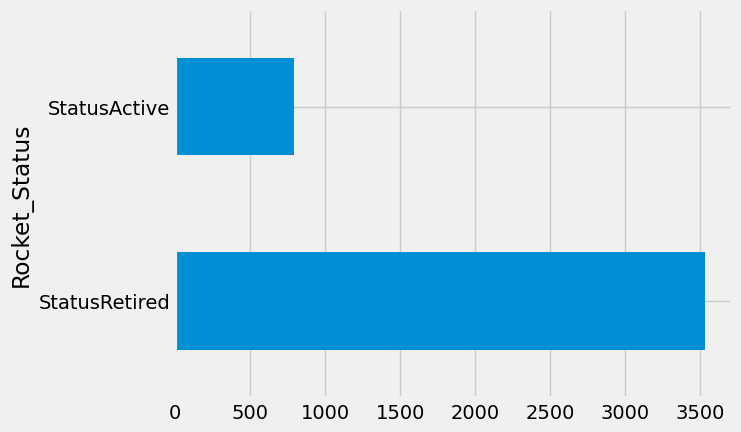

In [332]:
df_data.Rocket_Status.value_counts().plot(kind='barh')
# sns.histplot(df_data,x="Rocket_Status" ,stat='count')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [333]:
df_data.Mission_Status.value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [334]:
df_data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [335]:
df_data.Price.mean()

52.29483023992756

Text(0.5, 1.0, 'Total price distribution')

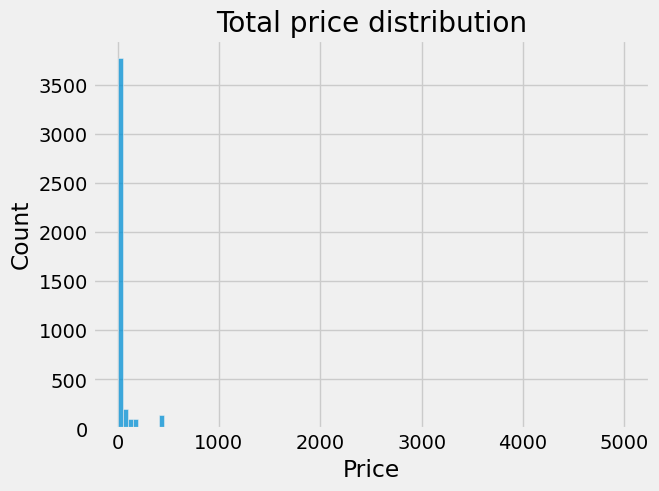

In [336]:
sns.histplot(data=df_data, x="Price",bins=100)
plt.title('Total price distribution')

In [337]:
df_data_adjusted = df_data[df_data['Price'].between(df_data['Price'].quantile(.05), df_data['Price'].quantile(.99))]

Text(0.5, 1.0, 'The price distribution without Outliers')

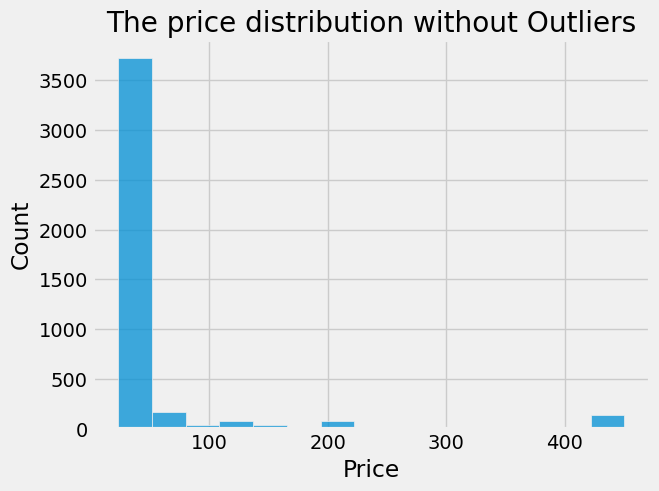

In [338]:
sns.histplot(data=df_data_adjusted, x="Price",bins=15)
plt.title('The price distribution without Outliers')

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [339]:
df_data['Country'] = df_data['Location'].str.split(', ').str[-1]

In [340]:
df_data.Country.unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [341]:
df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"
df_data.loc[(df_data['Country'] == 'Pacific Ocean'), "Country"] = "Russian Federation"


countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

df_data.head(2)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN


In [342]:
launches = df_data["Country"].value_counts().rename_axis('Country').reset_index(name="count")
launches.head()

,Country,count
0,RUS,2135
1,USA,1351
2,FRA,303
3,CHN,269
4,JPN,126


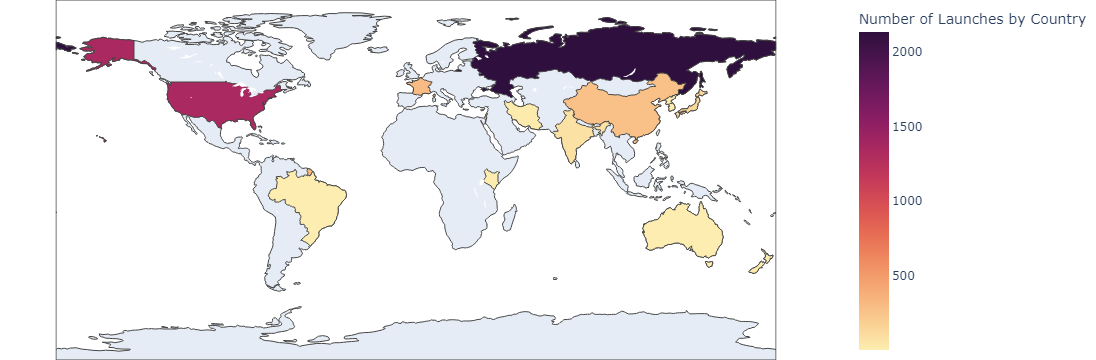

In [343]:
fig = px.choropleth(launches, locations='Country', color='count',
                           color_continuous_scale="matter",
                           # range_color=(0, 12),
                           scope="world",
                           labels={'count':'Number of Launches by Country'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

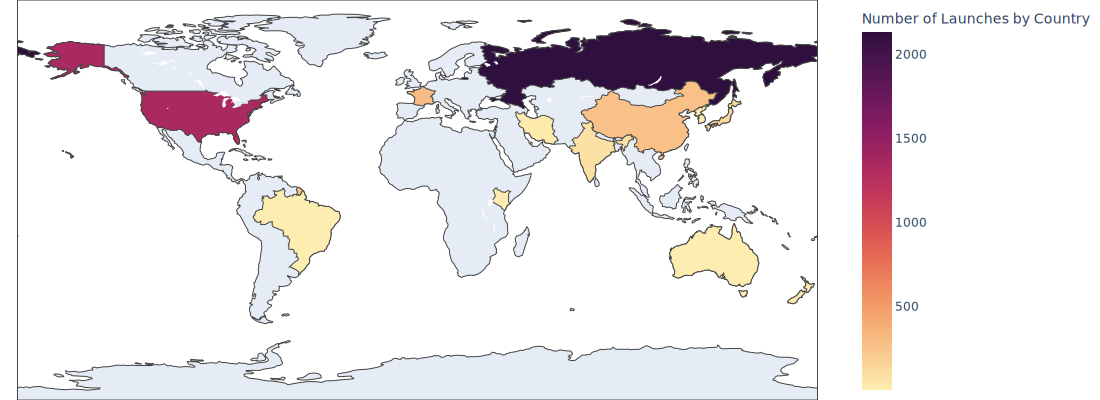

In [344]:
fig.show("svg", width = 1100, height = 400)

# Use a Choropleth Map to Show the Number of Failures by Country


In [345]:
statuses = df_data.groupby('Country')['Mission_Status'].value_counts().rename_axis((["Country", "Status"])).reset_index(name="counts")

failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()
failures.head()

,Status,counts
Country,,
AUS,Failure,3
BRA,FailurePrelaunch Failure,3
CHN,FailurePartial Failure,25
FRA,FailurePartial Failure,18
IND,FailurePartial Failure,13


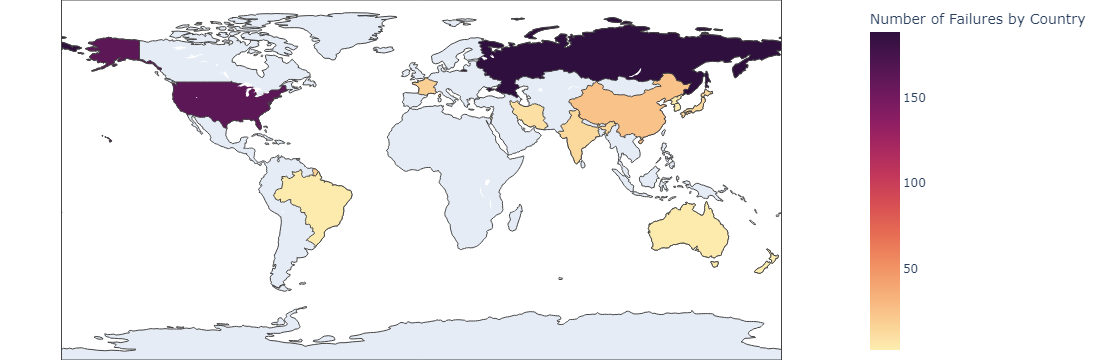

In [346]:
fig = px.choropleth(failures, locations=failures.index, color='counts',
                           color_continuous_scale="matter",
                           # range_color=(0, 12),
                           scope="world",
                           labels={'counts':'Number of Failures by Country'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

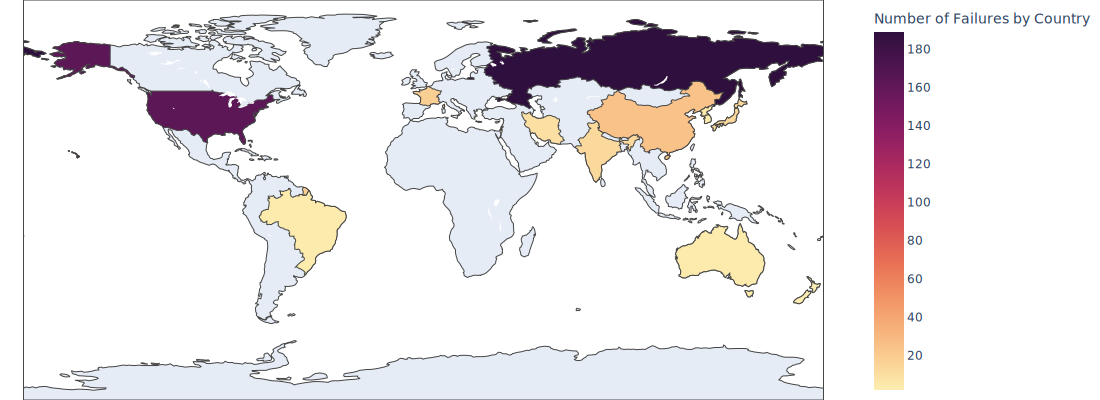

In [347]:
fig.show("svg", width = 1100, height = 400)

# Create a Plotly Sunburst Chart of the countries, Organizations, and mission status. 

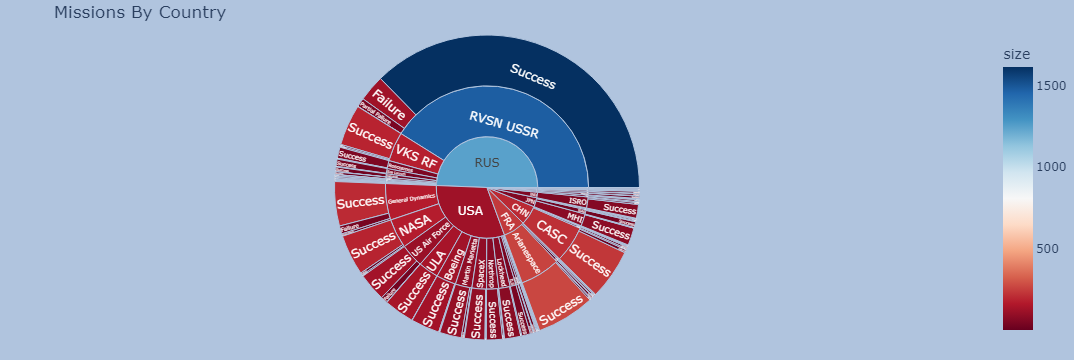

In [348]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values('size',ascending=False)
sunburst.head()
fig = px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"],
                  values="size", 
                  color='size',
                  color_continuous_scale='RdBu',
                  title = "Missions By Country")
# fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.update_layout(
    margin=dict(l=0, r=0, t=35, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

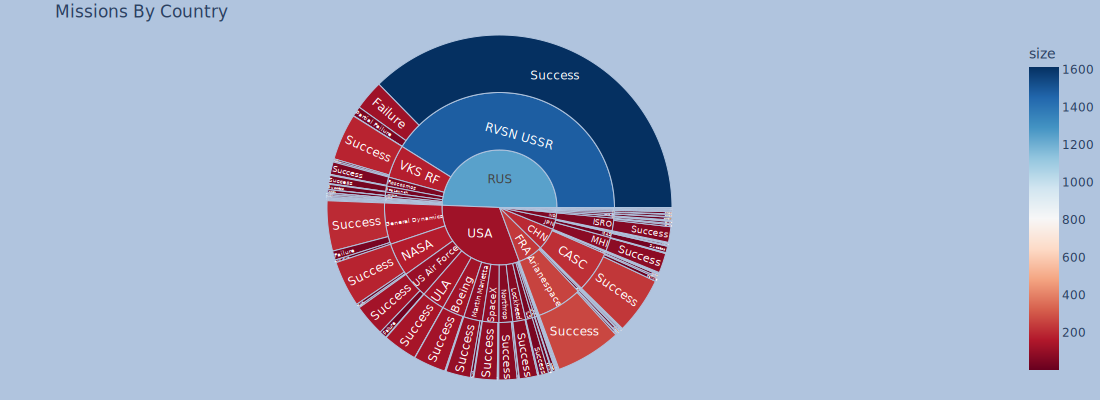

In [349]:
fig.show("svg", width = 1100, height = 400)

# Analyse the Total Amount of Money Spent by Organization on Space Missions

In [350]:
total_money_spent = df_data.groupby('Organisation')['Price'].sum().reset_index()
total_money_spent.sort_values('Price', ascending=False, inplace=True)
total_money_spent.head()

,Organisation,Price
35,NASA,"77,531.44"
40,RVSN USSR,"51,135.18"
3,Arianespace,"20,585.98"
48,ULA,"15,771.34"
7,CASC,"8,495.51"


# Analyse the Amount of Money Spent by Organization per Launch

In [351]:
expenses_per_launch = df_data.groupby("Organisation")["Price"].mean().reset_index()
expenses_per_launch.sort_values("Price", ascending=False).head()

,Organisation,Price
35,NASA,381.93
48,ULA,112.65
3,Arianespace,73.78
32,MHI,55.02
46,SpaceX,54.67


# Chart the Number of Launches per Year

In [352]:
df_data['Year'] = df_data['Date'].dt.year

In [353]:
launches_per_year = df_data['Year'].value_counts().reset_index().sort_values("Year")
launches_per_year.head()

,Year,count
63,1957,3
61,1958,28
62,1959,20
57,1960,39
42,1961,52


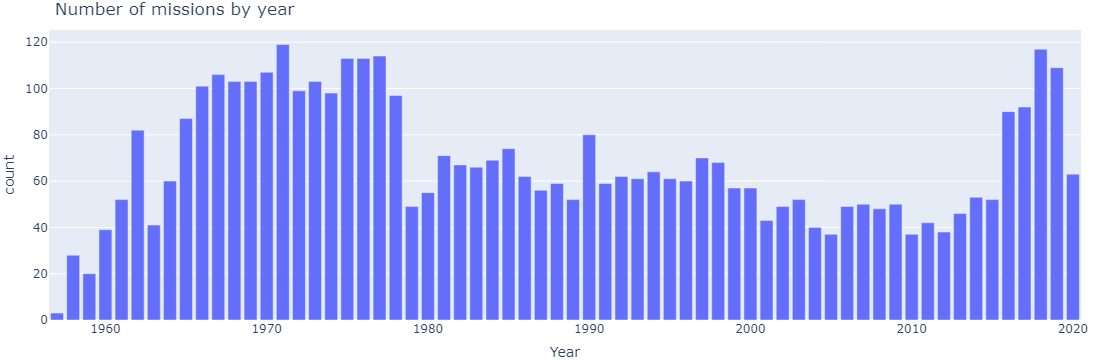

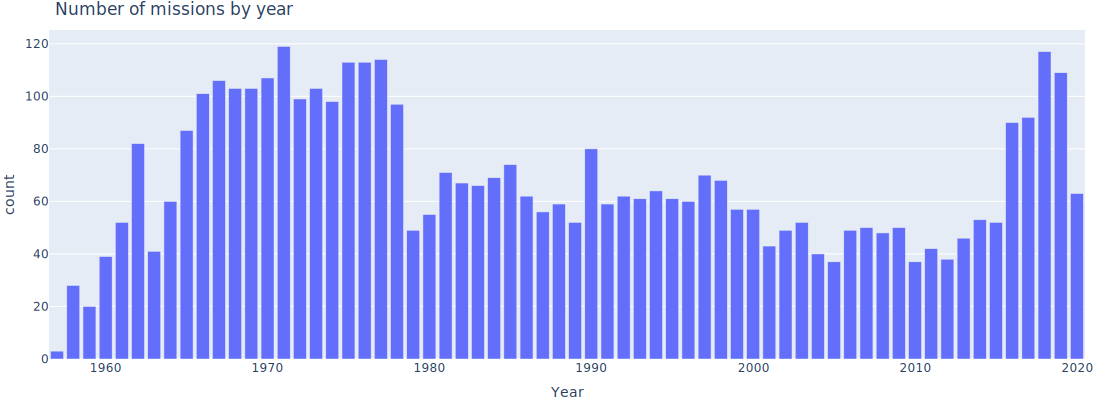

In [354]:
fig = px.bar(
    launches_per_year,
    x="Year",
    y="count",
    title='Number of missions by year',
)
fig.update_layout(margin = dict(t=30, l=0, r=15, b=0))
fig.show()
fig.show("svg", width = 1100, height = 400)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [355]:
df_data["Month"] = df_data['Date'].dt.month

In [356]:
launches_per_month = df_data.Month.value_counts().reset_index()
launches_per_month

,Month,count
0,12,450
1,6,402
2,4,383
3,10,381
4,8,373
5,9,365
6,3,353
7,7,351
8,2,336
9,11,336


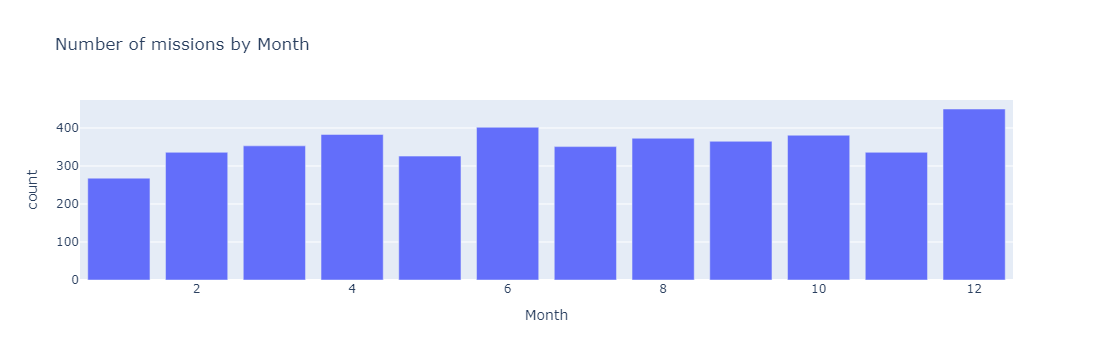

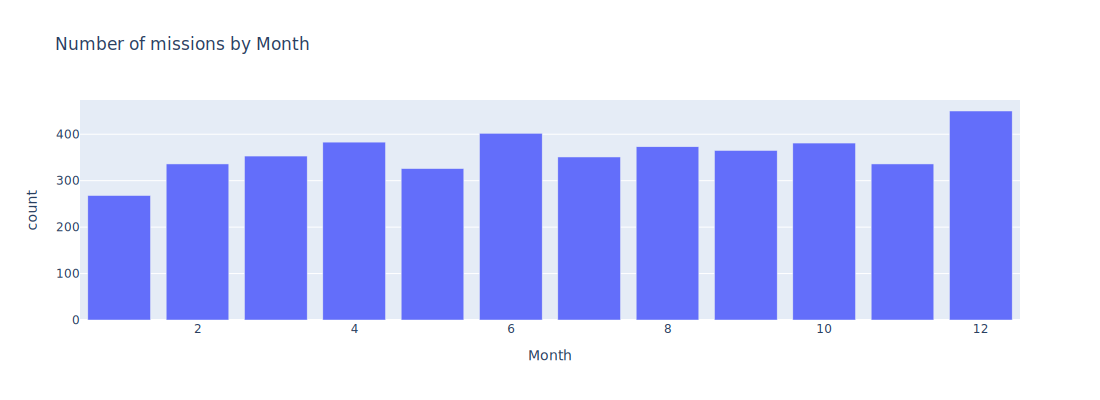

In [357]:
fig = px.bar(
    launches_per_month,
    x="Month",
    y="count",
    title='Number of missions by Month',
)
fig.show()
fig.show("svg", width = 1100, height = 400)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [358]:
# Most popular month for launches.
launches_per_month.sort_values("count", ascending=False).head(1)

,Month,count
0,12,450


In [359]:
# Least popular month for launches.
launches_per_month.sort_values("count").head(1)

,Month,count
11,1,268


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

Text(0.5, 1.0, 'The Launch Price variation Over Time')

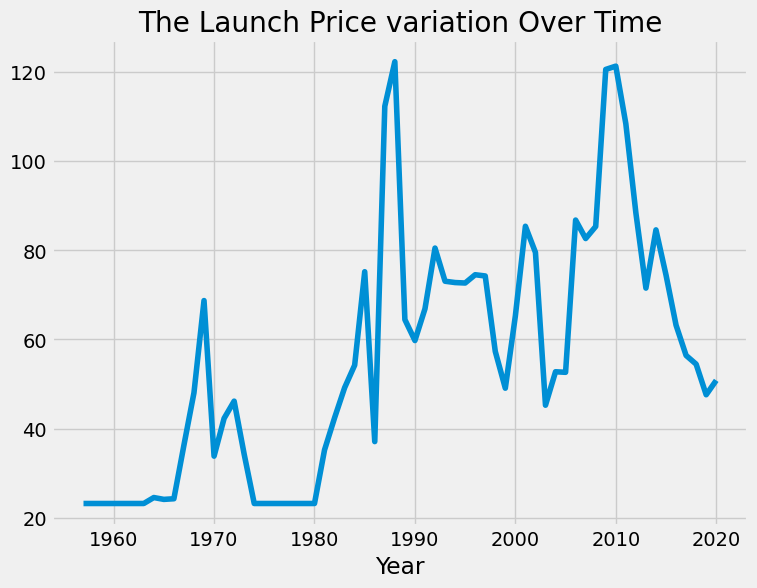

In [360]:
df_data.groupby('Year')['Price'].mean().plot(figsize=(8, 6))
plt.title('The Launch Price variation Over Time')

<Axes: xlabel='Year', ylabel='Price'>

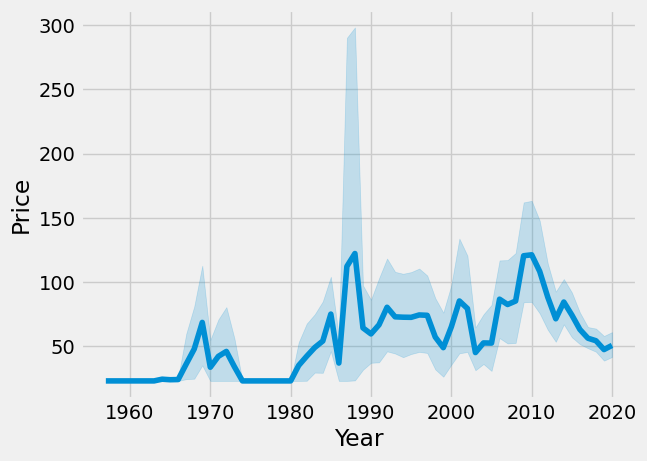

In [361]:
sns.lineplot(df_data, x="Year", y="Price")

# Chart the Number of Launches over Time by the Top 10 Organizations. 

How has the dominance of launches changed over time between the different players? 

In [362]:
plt.style.use("fivethirtyeight")

In [363]:
top_10_org = df_data.groupby("Organisation").count().sort_values("Date", ascending=False)[:10].index

Text(0.5, 0, 'Year')

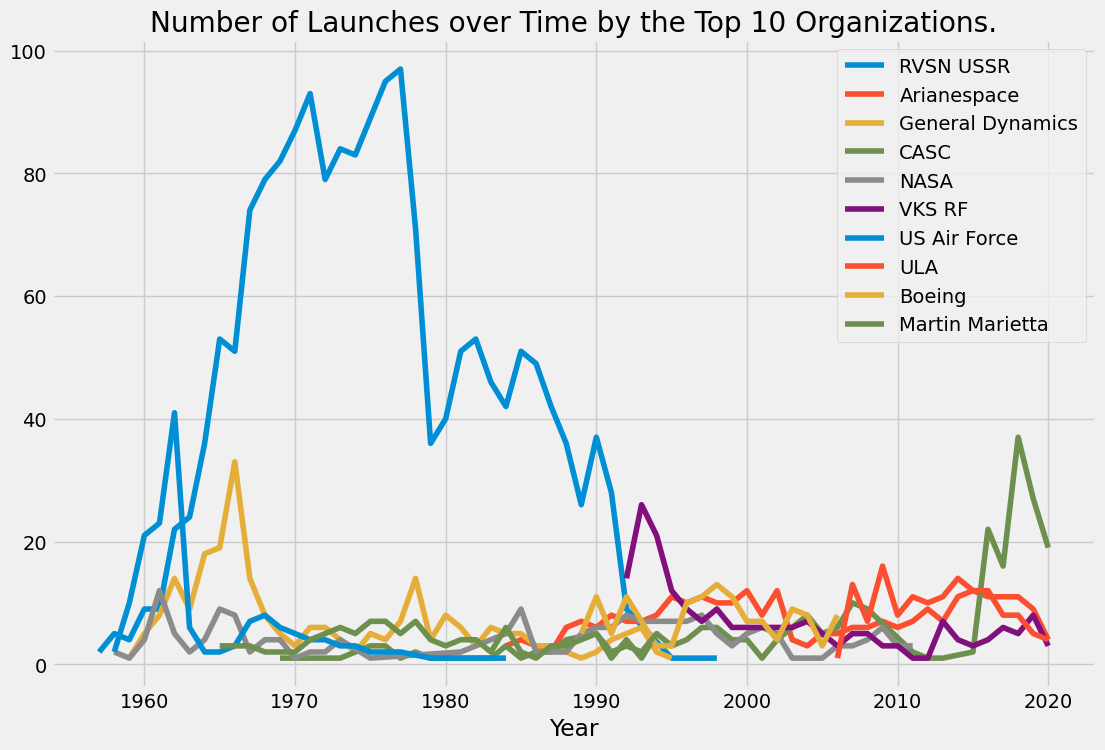

In [364]:
plt.figure(figsize=(12,8))
for org in top_10_org:
    df_data[df_data['Organisation']==org].groupby("Year")['Organisation'].count().plot(label=org)
plt.legend()
plt.title("Number of Launches over Time by the Top 10 Organizations.")
plt.xlabel("Year")

In [365]:
df_top_10_org = df_data[df_data['Organisation'].isin(top_10_org)].groupby(["Organisation","Year"]).size().reset_index(name='count')
df_top_10_org

,Organisation,Year,count
0,Arianespace,1984,3
1,Arianespace,1985,4
2,Arianespace,1986,3
3,Arianespace,1987,2
4,Arianespace,1988,6
...,...,...,...
318,VKS RF,2016,4
319,VKS RF,2017,6
320,VKS RF,2018,5
321,VKS RF,2019,8


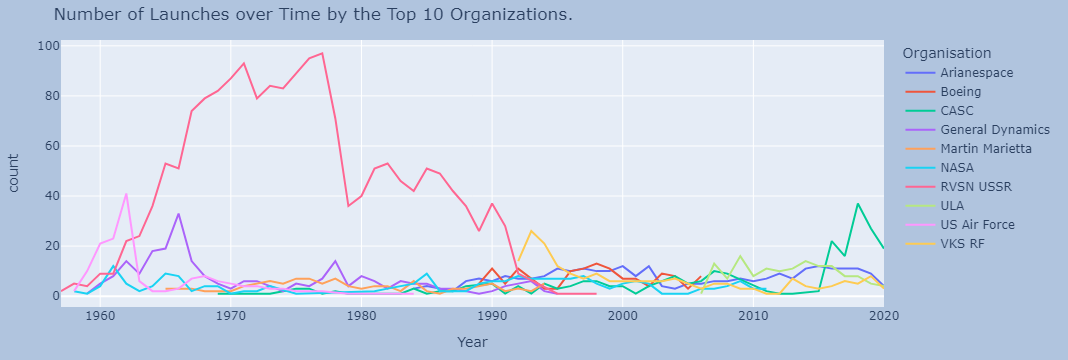

In [366]:
fig = px.line(df_top_10_org, x="Year", y="count", 
              color='Organisation',
              title="Number of Launches over Time by the Top 10 Organizations.")
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

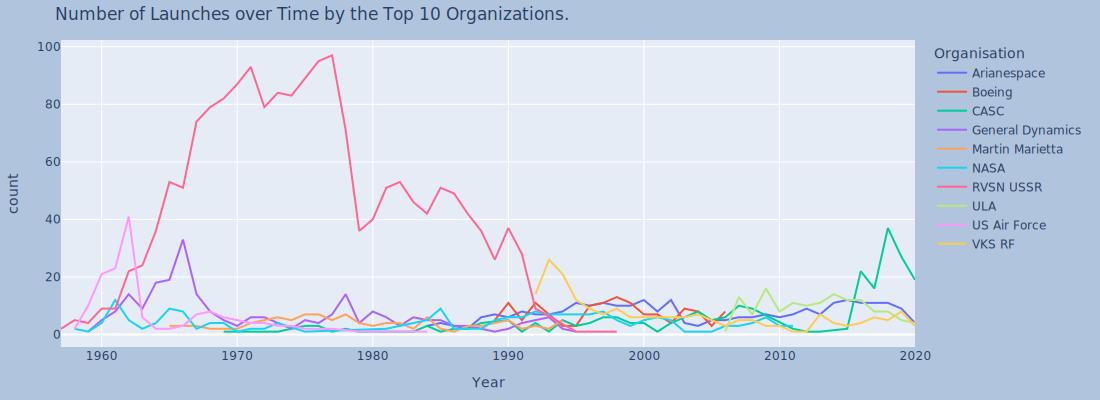

In [367]:
fig.show("svg", width = 1100, height = 400)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [368]:
camps = df_data[df_data["Year"] <= 1991]['Country'].value_counts().head(2).rename_axis('Country').reset_index(name="total")
camps

,Country,total
0,RUS,1770
1,USA,662


In [369]:
# df_data.Country.unique()

cold_war_period = df_data["Year"] <= 1991 
USSR = df_data['Country'] == "RUS"
USA = df_data['Country'] == "USA"

In [370]:
camps = df_data[(USSR | USA) & cold_war_period]['Country'].value_counts().rename_axis('Country').reset_index(name="total")
camps

,Country,total
0,RUS,1770
1,USA,662


In [371]:
colors = ["#355070", "#eaac8b"]
# "#e56b6f", "#eaac8b"]

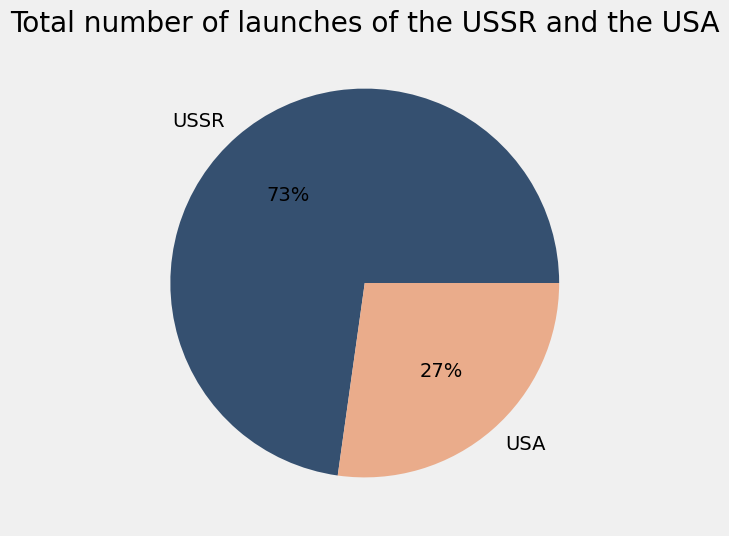

In [372]:
plt.figure(figsize=(12,6))
plt.pie(
    camps.total, 
    labels=['USSR', 'USA'], 
    colors=colors, 
    autopct='%.0f%%'
)
plt.title("Total number of launches of the USSR and the USA")
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [373]:
df_cold_war = df_data[(USSR | USA) & cold_war_period]
df_cold_war.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 12:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,23.17,Success,RUS,1991,12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,23.17,Success,RUS,1991,12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,23.17,Success,USA,1991,12
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,23.17,Success,USA,1991,11
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,23.17,Success,RUS,1991,11


In [374]:
missions_per_cold_war = df_cold_war.groupby(['Country',"Year"]).size()
# .rename_axis(['Country',"Year"]).reset_index(name="count")

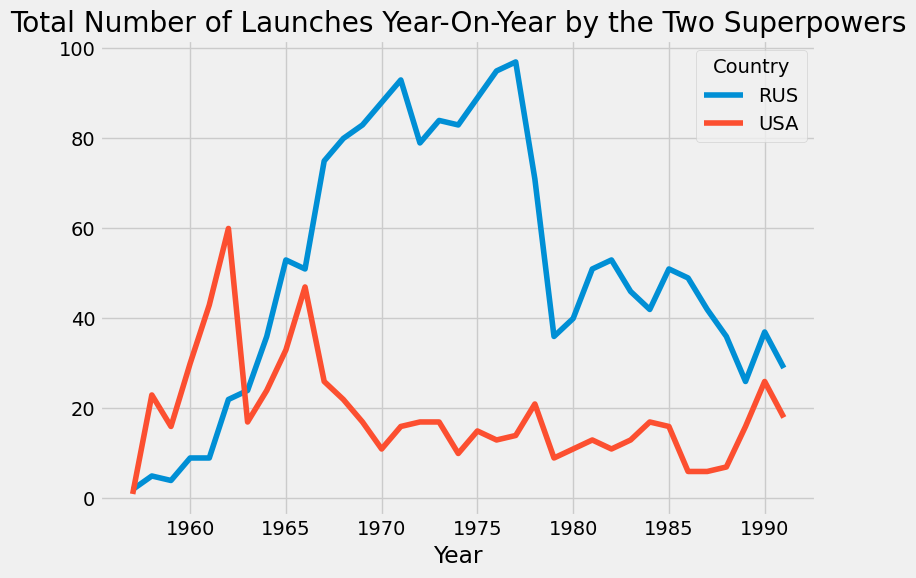

In [375]:
ax = missions_per_cold_war.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(8, 6))
plt.title('Total Number of Launches Year-On-Year by the Two Superpowers')
plt.tight_layout()

In [376]:
ussr_vs_usa = missions_per_cold_war.reset_index(name='count')

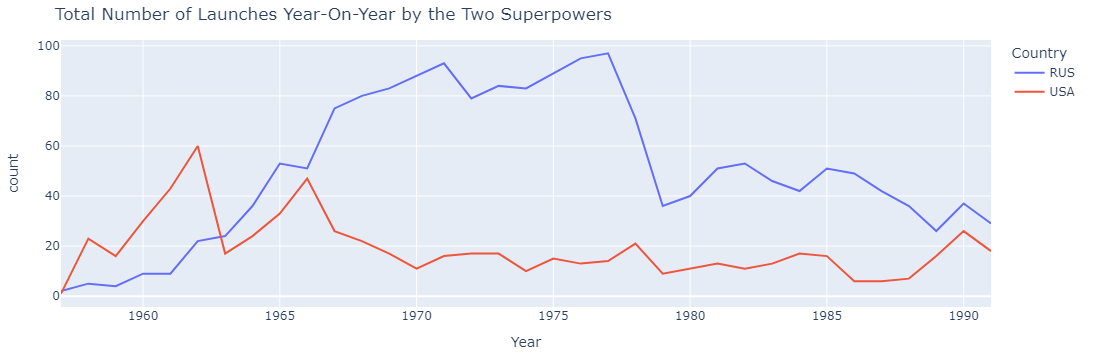

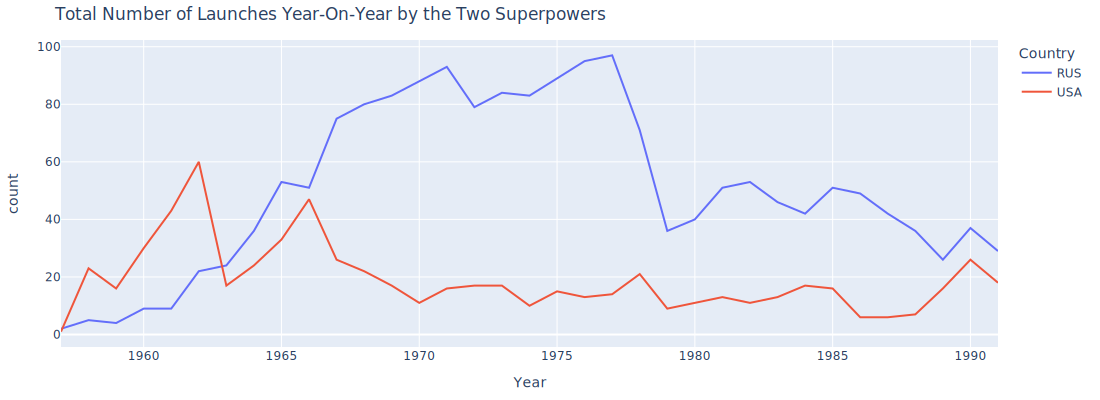

In [377]:
fig = px.line(ussr_vs_usa, x="Year", y="count", 
              color='Country',
              title='Total Number of Launches Year-On-Year by the Two Superpowers')

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    # paper_bgcolor="LightSteelBlue",
)
fig.show()
fig.show("svg", width = 1100, height = 400)

## Chart the Total Number of Mission Failures Year on Year.

In [378]:
# df_cold_war[(df_cold_war['Year'] == 1957) & USA]['Mission_Status'].value_counts()

In [379]:
total_faiure_over_years = df_data[df_data['Mission_Status'].str.contains('Fail')].groupby('Year').size().reset_index(name='count')
# total_faiure_over_years = total_faiure_over_years.set_index('Year')
total_faiure_over_years.tail()

,Year,count
59,2016,4
60,2017,8
61,2018,4
62,2019,9
63,2020,6


In [380]:
# ax = total_faiure_over_years.set_index('Year').plot(kind='bar', subplots=False, rot=0, figsize=(12, 6))
# plt.title('Total Number of Mission Failures Year-On-Year')
# plt.xticks(rotation='vertical')
# plt.tight_layout()

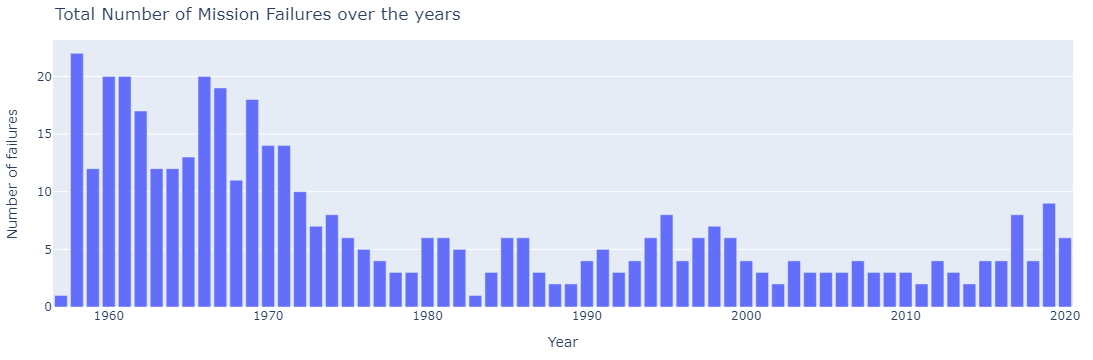

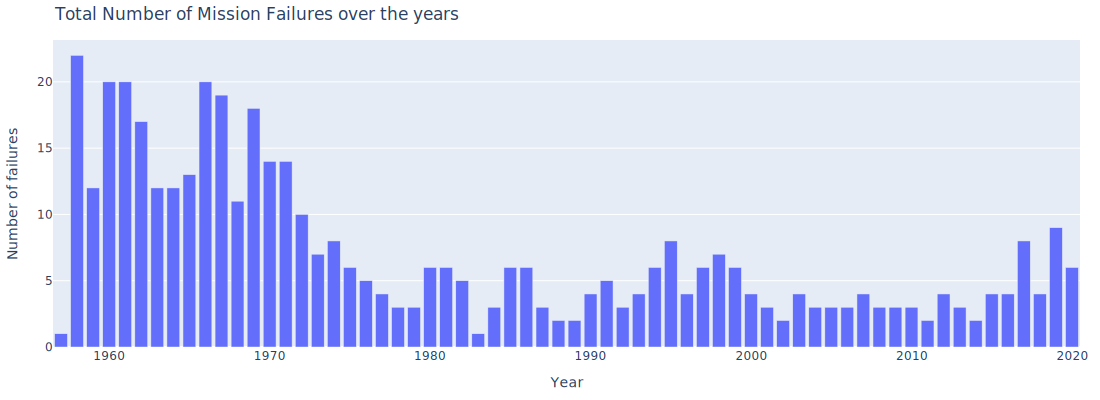

In [381]:
fig = px.bar(total_faiure_over_years, 
             x='Year', 
             y='count', 
             # color='leading_Country',
             labels={'count':'Number of failures'},
             title = "Total Number of Mission Failures over the years")

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    # paper_bgcolor="LightSteelBlue",
)

fig.show()
fig.show("svg", width = 1100, height = 400)

In [382]:
faiure_cold_war = df_cold_war[df_cold_war['Mission_Status'].str.contains('Fail')].groupby(['Country','Year']).size()
faiure_cold_war

Country  Year
RUS      1958    4
         1959    2
         1960    6
         1961    4
         1962    7
                ..
USA      1986    2
         1987    1
         1988    1
         1990    1
         1991    2
Length: 61, dtype: int64

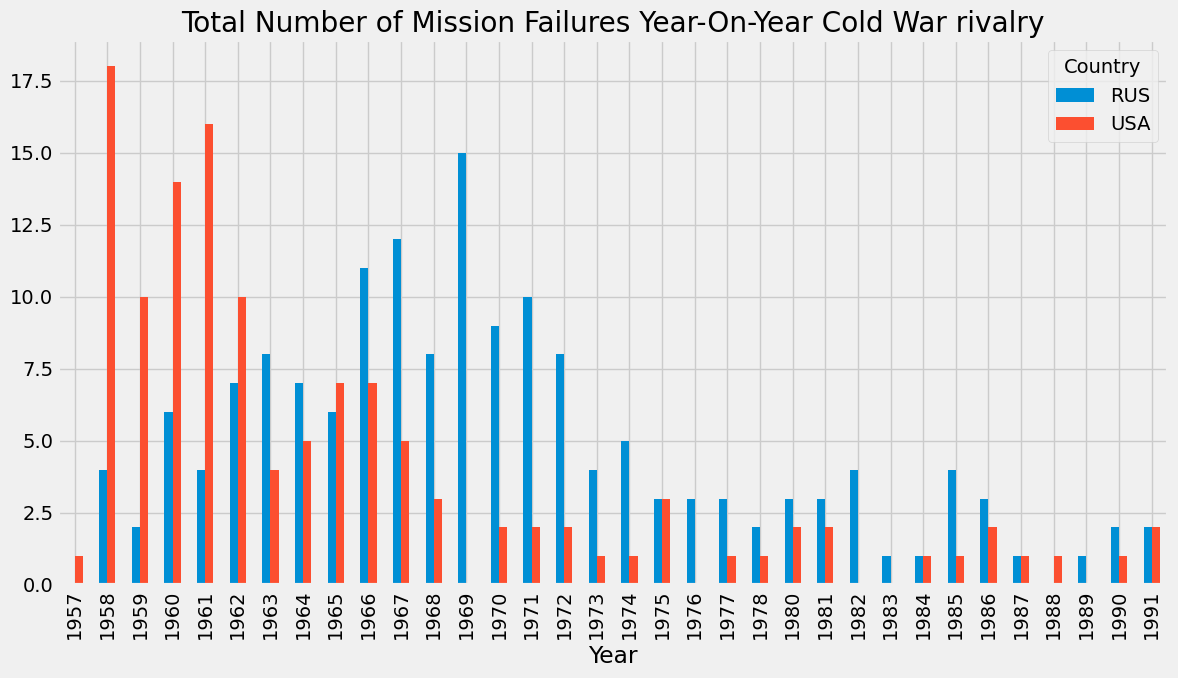

In [383]:
ax = faiure_cold_war.unstack(level=0).plot(kind='bar', subplots=False, rot=0, figsize=(12, 7))
plt.title('Total Number of Mission Failures Year-On-Year Cold War rivalry')
plt.xticks(rotation='vertical')
plt.tight_layout()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [384]:
fails_percentage = df_cold_war.groupby(['Country','Year']).agg(
          total = ('Mission_Status', pd.Series.count),
          fails = ('Mission_Status', lambda x : x.str.contains('Fail').sum()),
)

In [385]:
fails_percentage['percentage'] = fails_percentage['fails'] / fails_percentage['total'] * 100
fails_percentage.tail(10)

total  fails  percentage
Country Year                          
USA     1982     11      0        0.00
        1983     13      0        0.00
        1984     17      1        5.88
        1985     16      1        6.25
        1986      6      2       33.33
        1987      6      1       16.67
        1988      7      1       14.29
        1989     16      0        0.00
        1990     26      1        3.85
        1991     18      2       11.11

In [386]:
# df_cold_war[(df_cold_war['Year'] == 1957)  & USA]['Mission_Status'].value_counts()

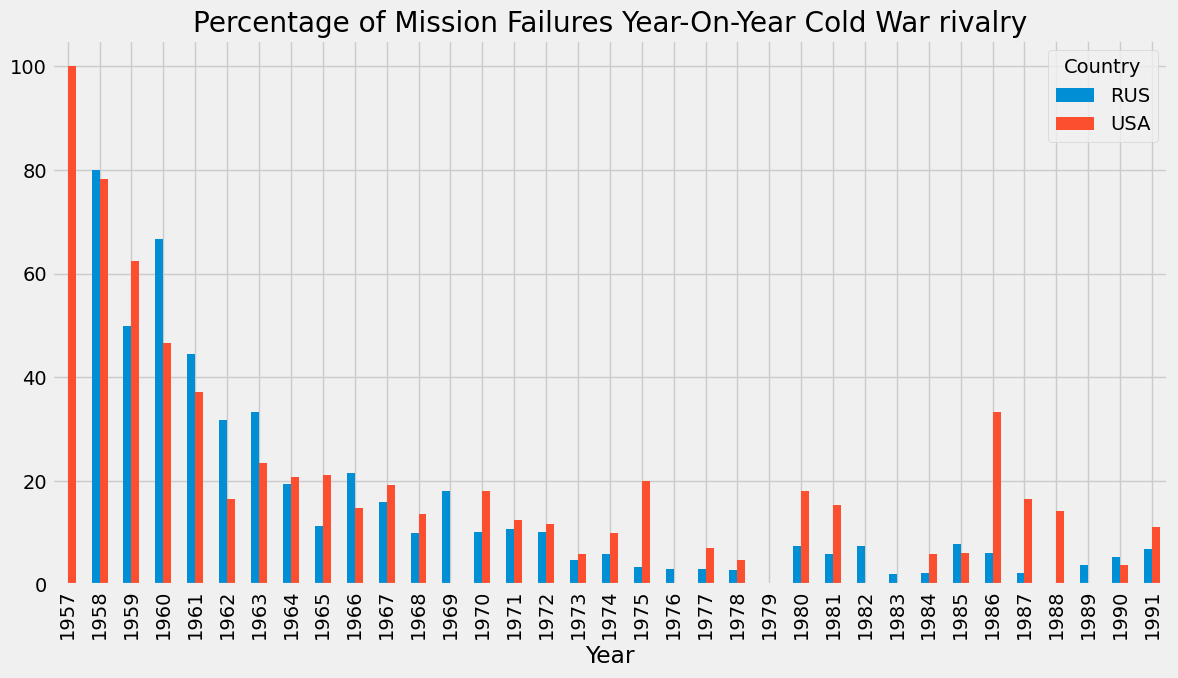

In [387]:
ax = fails_percentage['percentage'].unstack(level=0).plot(kind='bar', subplots=False, rot=0, figsize=(12, 7))
plt.title('Percentage of Mission Failures Year-On-Year Cold War rivalry')
plt.xticks(rotation='vertical')
plt.tight_layout()

In [388]:
total_fails_percentage = df_cold_war.groupby('Year').agg(
          total = ('Mission_Status', pd.Series.count),
          fails = ('Mission_Status', lambda x : x.str.contains('Fail').sum()),
)

In [389]:
total_fails_percentage['percentage'] = total_fails_percentage['fails'] / total_fails_percentage['total'] * 100
# total_fails_percentage.tail()

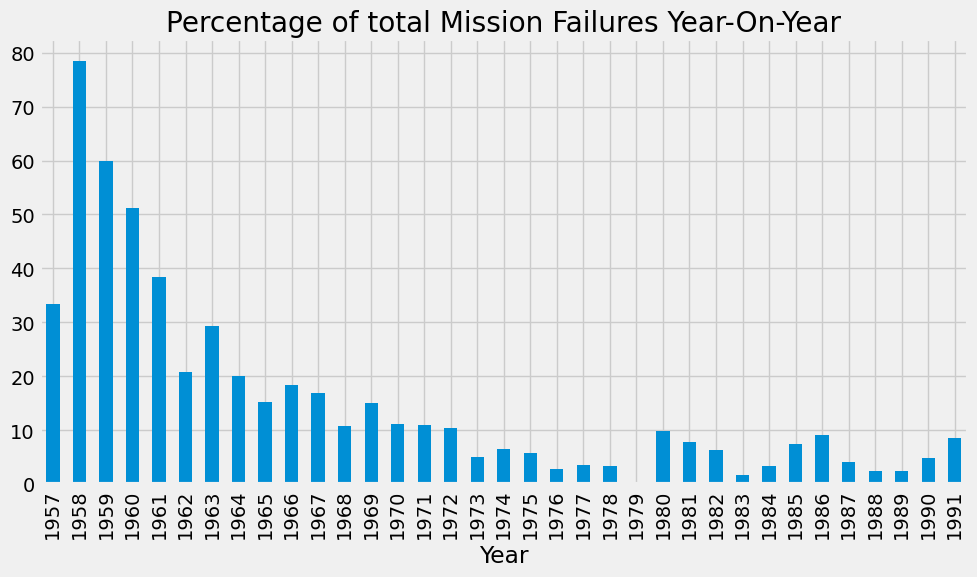

In [390]:
ax = total_fails_percentage['percentage'].plot(kind='bar', subplots=False, rot=0, figsize=(10, 6))
plt.title('Percentage of total Mission Failures Year-On-Year')
plt.xticks(rotation='vertical')
plt.tight_layout()

In [391]:
# total_fails_percentage.loc[1979]

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [392]:
# Filtering data by successful launches and group it by Country and Year then unstack it
df_lead = df_data[df_data['Mission_Status'] == "Success"].groupby(['Country','Year']).size().unstack(level=0)

In [393]:
# Then concat two pandas.series of the leading countries and number of missions of the corresponding year
df_lead_countries = pd.concat([df_lead.idxmax(axis=1),df_lead.max(axis=1)], axis=1)

In [394]:
df_lead_countries = df_lead_countries.rename(columns={0: "leading_Country", 1: "Number_of_launches"}, errors="raise")

In [395]:
df_lead_countries.tail()

,leading_Country,Number_of_launches
Year,,
2016,USA,26.00
2017,USA,30.00
2018,CHN,38.00
2019,CHN,32.00
2020,USA,20.00


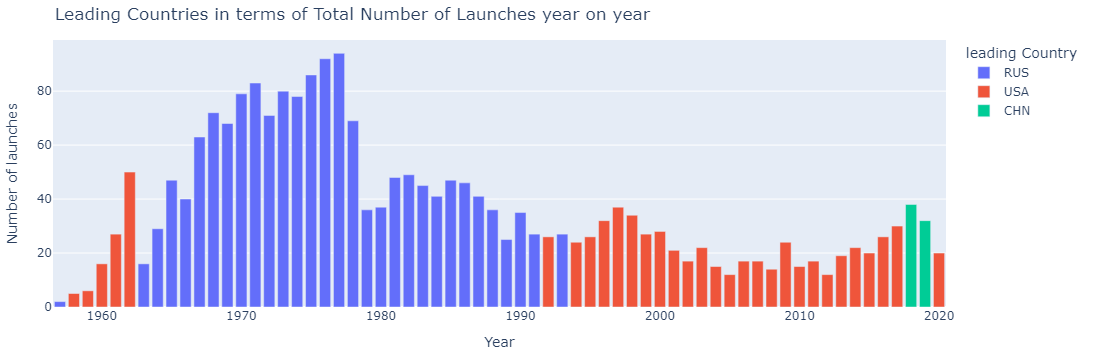

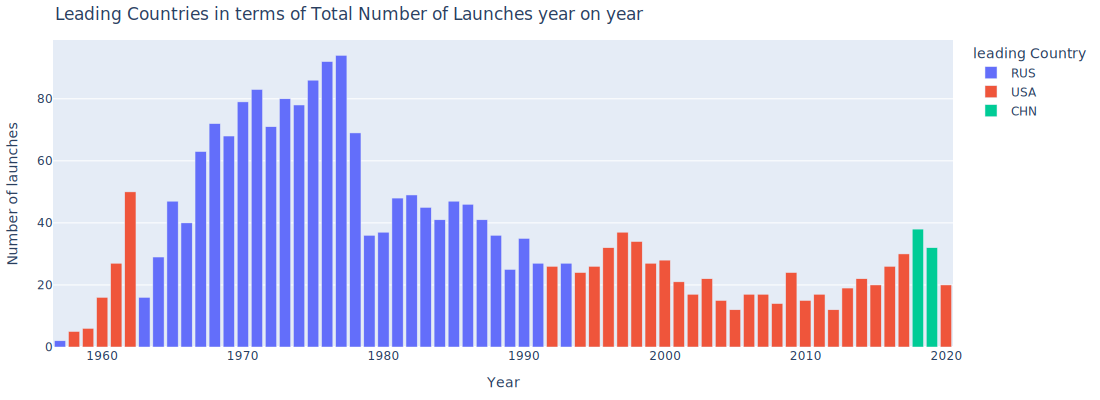

In [396]:
fig = px.bar(df_lead_countries, x=df_lead_countries.index, y='Number_of_launches', 
             color='leading_Country',
             labels={'Number_of_launches':'Number of launches', "leading_Country":"leading Country"},
             title = "Leading Countries in terms of Total Number of Launches year on year")

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    # paper_bgcolor="LightSteelBlue",
)

fig.show()
fig.show("svg", width = 1100, height = 400)

In [397]:
# fig.write_image("img/leading_country.svg", width = 1100, height = 400)

# Create a Year-on-Year Chart Showing the Organization Doing the Most Number of Launches

Which organization was dominant in the 1970s and 1980s? Which organization was dominant in 2018, 2019 and 2020? 

In [398]:
df = df_data.groupby(['Organisation','Year']).size().unstack(level=0)
df_lead_org = pd.concat([df.idxmax(axis=1), df.max(axis=1)], axis=1)

In [399]:
df_lead_org = df_lead_org.rename(columns={0: "leading_Organization", 1: "Number_of_launches"}, errors="raise")

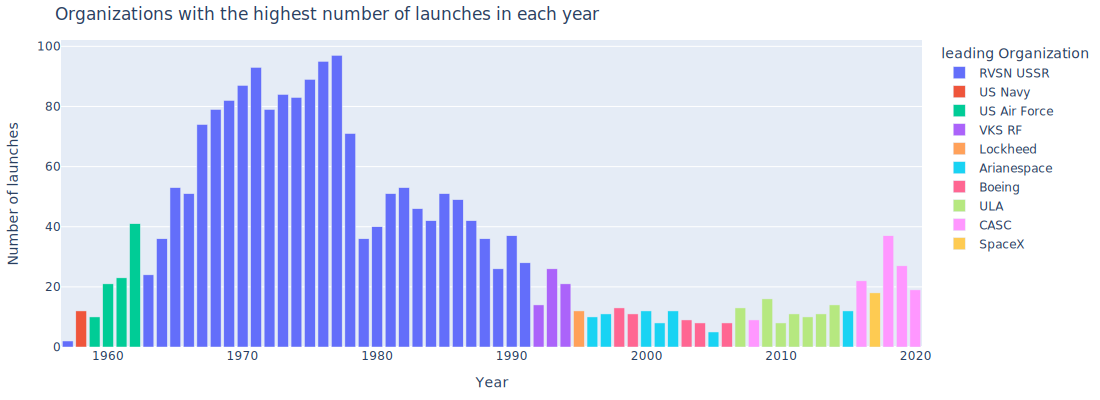

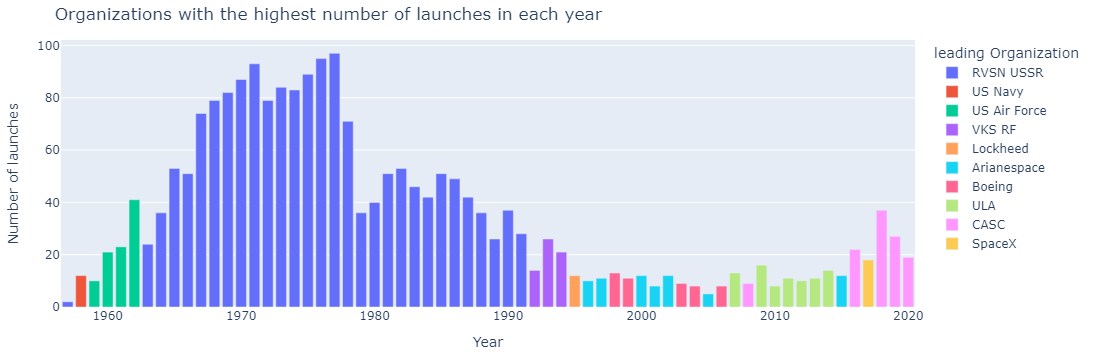

In [400]:
fig = px.bar(df_lead_org, x=df_lead_org.index, y='Number_of_launches', 
             color='leading_Organization',
             labels={'Number_of_launches':'Number of launches', "leading_Organization":"leading Organization"},
             title = "Organizations with the highest number of launches in each year")

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=15),
    # paper_bgcolor="LightSteelBlue",
)
fig.show("svg", width = 1100, height = 400)
fig.show()

In [401]:
# fig.write_image("img/leading_Organization.svg", width = 1100, height = 400)